Project Overview


The Indian Startup Ecosystem is the second largest in the world and this is a feat which did not happen by mere chance rather through planning, innovation, and supportive government interventions through the Startup Indian Initiative. 
The Ecosystem is made up of businesses from various sectors, in different locations, funding stages and intricate profile of the companies involved.
The period between 2018 and 2021 was particularly fascinating for the Indian startup scene. 
This era witnessed a confluence of factors that shaped the landscape, including regulatory changes, technological advancements, economic shifts, and societal dynamics. Startups across various sectors, including technology, e-commerce, healthcare, fintech, and more, made significant strides during this time. 
Understanding the key parameters that enabled these ventures to thrive is essential for those seeking to embark on their entrepreneurial journey within this ecosystem.
For a new business looking to penetrate the India startup ecosystem there is the need to investigate the existing systems with the help of available data and know how feasible and appropriate it will be in other for the business to thrive, this is what the project seeks to know and achieve.



# Hypothesis : Sector and Funding Amount
 Hypothesis 1: Top 5 Industries and funding received
 
 Null Hypothesis(H0): There is no significant differences between the group means.
 
 Alternative Hypothesis(H1): There is a significant difference between the group means

# Questions
1. Which sectors have received a higher amount of funding each year ?

2. which are top 10 companies that have received the most funds, as well as  their headquaters?

3. which are bottom 10 with the minimum funding and what are their headquaters?

4. How are the companies distributed across different funding stages?

5. is there a trend or partners in fundings across the year ?

6. which stage is likely to receive funds

In [4]:
#importing all the necessary tools need
import pandas as pd
import numpy as np
import pyodbc
from dotenv import dotenv_values
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

In [5]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')


# Get the values for the credentials you set in the '.env' file
database = environment_variables.get("DATABASE")
server = environment_variables.get("SERVER")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")


connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

In [6]:
#connection  string created
connection = pyodbc.connect(connection_string)


Codes for extracting the dataset ie. 2018, 2019, 2020 and 2021

In [7]:
#data for 2018 retrieved, csv file
data_2018=pd.read_csv('startup_funding2018.csv')
data_2018.head(2)

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...


In [8]:
#data for 2019 retrieved, csv file
data_2019=pd.read_csv('startup_funding2019.csv')
data_2019.head(2)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C


In [9]:
#query to retrieve 2020 data
query ='Select * from dbo.LP1_startup_funding2020'
data_2020 = pd.read_sql(query, connection)
data_2020.head(2)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None


In [10]:

#query to retrieve 2021 data
query ='Select * from dbo.LP1_startup_funding2021'
data_2021 = pd.read_sql(query, connection)
data_2021.head(2)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None


Data Quality Check And Exploratory Data Analysis

#DQC and EDA for 2018 data

In [11]:
#checking for the number of rows and columns
data_2018.shape

(526, 6)

In [12]:
#checking the information of the dataset
data_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


In [13]:
data_2018['Funding_Year'] = 2018

In [14]:
#checking for duplicate values
data_2018[data_2018.duplicated(keep=False)]

,Company Name,Industry,Round/Series,Amount,Location,About Company,Funding_Year
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018
348,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018


In [15]:
#dropping the duplicate values using using the index number 0= rows
data_2018=data_2018.drop(data_2018.index[348], axis=0)


In [16]:
data_2018['Industry'].unique()

array(['Brand Marketing, Event Promotion, Marketing, Sponsorship, Ticketing',
       'Agriculture, Farming',
       'Credit, Financial Services, Lending, Marketplace',
       'Financial Services, FinTech',
       'E-Commerce Platforms, Retail, SaaS',
       'Cloud Infrastructure, PaaS, SaaS',
       'Internet, Leisure, Marketplace', 'Market Research',
       'Information Services, Information Technology', 'Mobile Payments',
       'B2B, Shoes', 'Internet',
       'Apps, Collaboration, Developer Platform, Enterprise Software, Messaging, Productivity Tools, Video Chat',
       'Food Delivery', 'Industrial Automation',
       'Automotive, Search Engine, Service Industry',
       'Finance, Internet, Travel',
       'Accounting, Business Information Systems, Business Travel, Finance, SaaS',
       'Artificial Intelligence, Product Search, SaaS, Service Industry, Software',
       'Internet of Things, Waste Management',
       'Air Transportation, Freight Service, Logistics, Marine Transport

In [17]:

#checking for missing values
data_2018.isna().sum()

Company Name     0
Industry         0
Round/Series     0
Amount           0
Location         0
About Company    0
Funding_Year     0
dtype: int64

In [18]:
#retaining the first word before the comma in the industry column of the 2018 dataset
data_2018['Industry']=data_2018['Industry'].apply(str)
data_2018['Industry']=data_2018['Industry'].str.split(',').str[0]
data_2018['Industry']=data_2018['Industry'].replace("","'",regex=True)
data_2018

,Company Name,Industry,Round/Series,Amount,Location,About Company,Funding_Year
0,TheCollegeFever,Brand Marketing,Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018
1,Happy Cow Dairy,Agriculture,Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,2018
2,MyLoanCare,Credit,Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,2018
3,PayMe India,Financial Services,Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2018
4,Eunimart,E-Commerce Platforms,Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,2018
...,...,...,...,...,...,...,...
521,Udaan,B2B,Series C,225000000,"Bangalore, Karnataka, India","Udaan is a B2B trade platform, designed specif...",2018
522,Happyeasygo Group,Tourism,Series A,—,"Haryana, Haryana, India",HappyEasyGo is an online travel domain.,2018
523,Mombay,Food and Beverage,Seed,7500,"Mumbai, Maharashtra, India",Mombay is a unique opportunity for housewives ...,2018
524,Droni Tech,Information Technology,Seed,"₹35,000,000","Mumbai, Maharashtra, India",Droni Tech manufacture UAVs and develop softwa...,2018


In [19]:
#retaining the city names out of the location column which contains city name, country and state. The country and state will be dropped in order to maintain the city name
data_2018['Location']=data_2018['Location'].apply(str)
data_2018['Location']=data_2018['Location'].str.split(',').str[0]
data_2018['Location']=data_2018['Location'].replace("","'",regex=True)
data_2018

,Company Name,Industry,Round/Series,Amount,Location,About Company,Funding_Year
0,TheCollegeFever,Brand Marketing,Seed,250000,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",2018
1,Happy Cow Dairy,Agriculture,Seed,"₹40,000,000",Mumbai,A startup which aggregates milk from dairy far...,2018
2,MyLoanCare,Credit,Series A,"₹65,000,000",Gurgaon,Leading Online Loans Marketplace in India,2018
3,PayMe India,Financial Services,Angel,2000000,Noida,PayMe India is an innovative FinTech organizat...,2018
4,Eunimart,E-Commerce Platforms,Seed,—,Hyderabad,Eunimart is a one stop solution for merchants ...,2018
...,...,...,...,...,...,...,...
521,Udaan,B2B,Series C,225000000,Bangalore,"Udaan is a B2B trade platform, designed specif...",2018
522,Happyeasygo Group,Tourism,Series A,—,Haryana,HappyEasyGo is an online travel domain.,2018
523,Mombay,Food and Beverage,Seed,7500,Mumbai,Mombay is a unique opportunity for housewives ...,2018
524,Droni Tech,Information Technology,Seed,"₹35,000,000",Mumbai,Droni Tech manufacture UAVs and develop softwa...,2018


In [20]:
data_2018['Amount'].unique()

array(['250000', '₹40,000,000', '₹65,000,000', '2000000', '—', '1600000',
       '₹16,000,000', '₹50,000,000', '₹100,000,000', '150000', '1100000',
       '₹500,000', '6000000', '650000', '₹35,000,000', '₹64,000,000',
       '₹20,000,000', '1000000', '5000000', '4000000', '₹30,000,000',
       '2800000', '1700000', '1300000', '₹5,000,000', '₹12,500,000',
       '₹15,000,000', '500000', '₹104,000,000', '₹45,000,000', '13400000',
       '₹25,000,000', '₹26,400,000', '₹8,000,000', '₹60,000', '9000000',
       '100000', '20000', '120000', '₹34,000,000', '₹342,000,000',
       '$143,145', '₹600,000,000', '$742,000,000', '₹1,000,000,000',
       '₹2,000,000,000', '$3,980,000', '$10,000', '₹100,000',
       '₹250,000,000', '$1,000,000,000', '$7,000,000', '$35,000,000',
       '₹550,000,000', '$28,500,000', '$2,000,000', '₹240,000,000',
       '₹120,000,000', '$2,400,000', '$30,000,000', '₹2,500,000,000',
       '$23,000,000', '$150,000', '$11,000,000', '₹44,000,000',
       '$3,240,000', '₹60

Changing the Amount column to a Float, and it will be stored in an object. Currency sign will be removed and empty values  '_' will be replaced with 0'.
Going by the assumption that all values are in dollars except the ones with the 'Rupees' symbol. Values with rupees symbol will be converted to dollars and the empty values
to 0. All values are to be in dollars

In [21]:
def convert_to_dollars(value, conversion_rate):
    try:
        if'₹' in value:
            #extract the numeric part and convert to float
            amount_in_rupees = float(value.replace('₹','').replace(',',''))

            #change to dollars using the conversion rate
            amount_in_dollars = amount_in_rupees*conversion_rate

            #print(f'converted_value:{amount_in_dollars}')
            return amount_in_dollars
        elif value== '-':
            return 0.0
        else:
            #replace commas and convert to float
            return float(value.replace(',','').replace('$',''))
    except ValueError:
        #code for situations where conversion to float fails(eg data is a non numeric value)
        return None
conversion_rate = 0.0146 #according to https://www.exchange-rates.org/exchange-rate-history/inr-usd-2018

data_2018['Amount']=data_2018['Amount'].apply(lambda x: convert_to_dollars(x,conversion_rate))
    
    #Show the updated 2018 dataframe with the converted values
print(data_2018)

          Company Name                Industry Round/Series       Amount  \
0      TheCollegeFever         Brand Marketing         Seed     250000.0   
1      Happy Cow Dairy             Agriculture         Seed     584000.0   
2           MyLoanCare                  Credit     Series A     949000.0   
3          PayMe India      Financial Services        Angel    2000000.0   
4             Eunimart    E-Commerce Platforms         Seed          NaN   
..                 ...                     ...          ...          ...   
521              Udaan                     B2B     Series C  225000000.0   
522  Happyeasygo Group                 Tourism     Series A          NaN   
523             Mombay       Food and Beverage         Seed       7500.0   
524         Droni Tech  Information Technology         Seed     511000.0   
525            Netmeds           Biotechnology     Series C   35000000.0   

      Location                                      About Company  \
0    Bangalore  Th

In [22]:
data_2018.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company,Funding_Year
0,TheCollegeFever,Brand Marketing,Seed,250000.0,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",2018
1,Happy Cow Dairy,Agriculture,Seed,584000.0,Mumbai,A startup which aggregates milk from dairy far...,2018
2,MyLoanCare,Credit,Series A,949000.0,Gurgaon,Leading Online Loans Marketplace in India,2018
3,PayMe India,Financial Services,Angel,2000000.0,Noida,PayMe India is an innovative FinTech organizat...,2018
4,Eunimart,E-Commerce Platforms,Seed,NaN,Hyderabad,Eunimart is a one stop solution for merchants ...,2018


In [23]:
#renaming the columns of the 2018 dataset
data_2018.rename(columns={'Amount':'Amount($)', 'Location':'HeadQuarter', 'Round/Series': 'Stage'}, inplace=True)

In [24]:
data_2018['Stage'].unique()

array(['Seed', 'Series A', 'Angel', 'Series B', 'Pre-Seed',
       'Private Equity', 'Venture - Series Unknown', 'Grant',
       'Debt Financing', 'Post-IPO Debt', 'Series H', 'Series C',
       'Series E', 'Corporate Round', 'Undisclosed',
       'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593',
       'Series D', 'Secondary Market', 'Post-IPO Equity',
       'Non-equity Assistance', 'Funding Round'], dtype=object)

In [25]:
#replacing the row with the link with Unknown
data_2018['Stage']=data_2018['Stage'].replace({'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593':'unknown', 'Venture - Series Unknown': 'unknown', 'Undisclosed': 'unknown'})


In [26]:
data_2018['Industry'].unique()

array(['Brand Marketing', 'Agriculture', 'Credit', 'Financial Services',
       'E-Commerce Platforms', 'Cloud Infrastructure', 'Internet',
       'Market Research', 'Information Services', 'Mobile Payments',
       'B2B', 'Apps', 'Food Delivery', 'Industrial Automation',
       'Automotive', 'Finance', 'Accounting', 'Artificial Intelligence',
       'Internet of Things', 'Air Transportation', 'Food and Beverage',
       'Autonomous Vehicles', 'Enterprise Software', 'Logistics',
       'Insurance', 'Information Technology', 'Blockchain', 'Education',
       'E-Commerce', 'Renewable Energy', 'E-Learning', 'Clean Energy',
       'Transportation', 'Fitness', 'Hospitality',
       'Media and Entertainment', 'Broadcasting', 'EdTech', 'Health Care',
       '—', 'Sports', 'Big Data', 'Cloud Computing', 'Food Processing',
       'Trading Platform', 'Consumer Goods', 'Wellness', 'Fashion',
       'Consulting', 'Biotechnology', 'Communities', 'Consumer',
       'Consumer Applications', 'Mobile',

In [27]:
#replacing the dash(-) in the Industry column with unknown
data_2018['Industry']=data_2018['Industry'].replace({'—':'unknown'})

In [28]:
#checking the datatype after all the edits
data_2018.dtypes

Company Name      object
Industry          object
Stage             object
Amount($)        float64
HeadQuarter       object
About Company     object
Funding_Year       int64
dtype: object

In [29]:
data_2018.describe().T

,count,mean,std,min,25%,50%,75%,max
Amount($),377.0,1.761677e+07,7.797261e+07,876.0,500000.0,1300000.0,5000000.0,1.000000e+09
Funding_Year,525.0,2.018000e+03,0.000000e+00,2018.0,2018.0,2018.0,2018.0,2.018000e+03


#DQC and EDA for 2019 data

In [30]:
#checking for the number of rows and columns
data_2019.shape

(89, 9)

In [31]:
#checking the information of the dataset
data_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


In [32]:
data_2019['Funding_Year'] = 2019

checking  the columns and of the 2019 dataset

In [33]:
data_2019['Amount($)'].unique()

array(['$6,300,000', '$150,000,000', '$28,000,000', '$30,000,000',
       '$6,000,000', 'Undisclosed', '$1,000,000', '$20,000,000',
       '$275,000,000', '$22,000,000', '$5,000,000', '$140,500',
       '$540,000,000', '$15,000,000', '$182,700', '$12,000,000',
       '$11,000,000', '$15,500,000', '$1,500,000', '$5,500,000',
       '$2,500,000', '$140,000', '$230,000,000', '$49,400,000',
       '$32,000,000', '$26,000,000', '$150,000', '$400,000', '$2,000,000',
       '$100,000,000', '$8,000,000', '$100,000', '$50,000,000',
       '$120,000,000', '$4,000,000', '$6,800,000', '$36,000,000',
       '$5,700,000', '$25,000,000', '$600,000', '$70,000,000',
       '$60,000,000', '$220,000', '$2,800,000', '$2,100,000',
       '$7,000,000', '$311,000,000', '$4,800,000', '$693,000,000',
       '$33,000,000'], dtype=object)

In [34]:
#taking of the dollar sign from the 2019 values 
data_2019['Amount($)'] = data_2019['Amount($)'].apply(str)
data_2019['Amount($)'].replace(',', '', inplace = True, regex=True)
data_2019['Amount($)'].replace('Undisclosed', np.nan, inplace = True, regex=True)
data_2019['Amount($)'] = data_2019['Amount($)'].apply(lambda x: float(str(x).replace('$','')))
data_2019['Founded'].replace('nan', np.nan, inplace = True, regex=True)
data_2019.head() 

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Funding_Year
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,6300000.0,NaN,2019
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,150000000.0,Series C,2019
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey",28000000.0,Fresh funding,2019
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...",30000000.0,Series D,2019
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),6000000.0,NaN,2019


In [35]:
#checking for duplicates #observation : there are no duplicate values in the 2019 date
data_2019[data_2019.duplicated(keep=False)]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Funding_Year


In [36]:
data_2019['Stage'].unique()

array([nan, 'Series C', 'Fresh funding', 'Series D', 'Pre series A',
       'Series A', 'Series G', 'Series B', 'Post series A',
       'Seed funding', 'Seed fund', 'Series E', 'Series F', 'Series B+',
       'Seed round', 'Pre-series A'], dtype=object)

In [37]:
data_2019['Company/Brand'].unique()

array(['Bombay Shaving', 'Ruangguru', 'Eduisfun', 'HomeLane', 'Nu Genes',
       'FlytBase', 'Finly', 'Kratikal', 'Quantiphi', 'Lenskart',
       'Cub McPaws', 'Appnomic', 'Kaleidofin', 'JobSquare', 'Open Secret',
       'LivFin', "Byju's", 'Zest Money', 'Witblox',
       'Azah Personal Care Pvt. Ltd.', 'SalaryFits', 'Pristyn Care',
       'Springboard', 'DROR Labs Pvt. Ltd', 'Medlife', 'Seekify',
       'Toffee Insurance', 'Fireflies .ai', 'HungerBox', 'Bijak',
       'Licious', 'truMe', 'Pumpkart', 'Asteria Aerospace', 'Rivigo',
       'HappyEasyGo', 'Zetwerk', 'Observe.AI', 'Freshokartz',
       'Lil’ Goodness and sCool meal', 'Trell', 'VMate',
       'Bombay Shirt Company', 'Slintel', 'MyGameMate', 'Afinoz',
       'Rein Games', 'Ecozen', 'Box8', 'Awign Enterprises', 'Purplle',
       'Freightwalla', 'TapChief', 'eJOHRI', 'Ninjacart', 'Binca Games',
       'KredX', 'm.Paani', 'Origo', 'WishADish', 'Ecom Express',
       'Stanza Living', 'PiBeam', 'Euler Motors', 'Moms Co',
       '

In [38]:
data_2019['Founded'].unique()

array([  nan, 2014., 2004., 2013., 2010., 2018., 2019., 2017., 2011.,
       2015., 2016., 2012., 2008.])

In [39]:
data_2019['HeadQuarter'].unique()

array([nan, 'Mumbai', 'Chennai', 'Telangana', 'Pune', 'Bangalore',
       'Noida', 'Delhi', 'Ahmedabad', 'Gurugram', 'Haryana', 'Chandigarh',
       'Jaipur', 'New Delhi', 'Surat', 'Uttar pradesh', 'Hyderabad',
       'Rajasthan'], dtype=object)

In [40]:
data_2019['Sector'].unique()

array(['Ecommerce', 'Edtech', 'Interior design', 'AgriTech', 'Technology',
       'SaaS', 'AI & Tech', 'E-commerce', 'E-commerce & AR', 'Fintech',
       'HR tech', 'Food tech', 'Health', 'Healthcare', 'Safety tech',
       'Pharmaceutical', 'Insurance technology', 'AI', 'Foodtech', 'Food',
       'IoT', 'E-marketplace', 'Robotics & AI', 'Logistics', 'Travel',
       'Manufacturing', 'Food & Nutrition', 'Social Media', nan,
       'E-Sports', 'Cosmetics', 'B2B', 'Jewellery', 'B2B Supply Chain',
       'Games', 'Food & tech', 'Accomodation', 'Automotive tech',
       'Legal tech', 'Mutual Funds', 'Cybersecurity', 'Automobile',
       'Sports', 'Healthtech', 'Yoga & wellness', 'Virtual Banking',
       'Transportation', 'Transport & Rentals',
       'Marketing & Customer loyalty', 'Infratech', 'Hospitality',
       'Automobile & Technology', 'Banking'], dtype=object)

In [41]:
data_2019['Investor'].unique()

array(['Sixth Sense Ventures', 'General Atlantic',
       'Deepak Parekh, Amitabh Bachchan, Piyush Pandey',
       'Evolvence India Fund (EIF), Pidilite Group, FJ Labs',
       'Innovation in Food and Agriculture (IFA)', 'Undisclosed',
       'Social Capital, AngelList India, Gemba Capital, Omphalos Ventures,\xa0\xa091springboard via Atal Innovation Mission, Niti Aayog.',
       'Gilda VC, Art Venture, Rajeev Chitrabhanu.',
       'Multiples Alternate Asset Management', 'SoftBank',
       'Venture Catalysts', 'Avataar Ventures', 'Oikocredit',
       'Titan Capital', 'Matrix Partners',
       'German development finance institution DEG',
       'South Africa’s Naspers Ventures, the CPP Investment Board',
       'Goldman Sachs.', 'Mumbai Angels Network',
       'Kunal Bahl, Rohit Bansal.', 'Brazilian VC Fund Confrapar',
       'Sequoia India, Hummingbird Ventures, Greenoaks Capital, AngelList.',
       'Reach Capital', 'Inflection Point Ventures',
       'Wilson Global Opportunities Fund

In [42]:
data_2019['Founders'].unique()

array(['Shantanu Deshpande', 'Adamas Belva Syah Devara, Iman Usman.',
       'Jatin Solanki', 'Srikanth Iyer, Rama Harinath',
       'Narayana Reddy Punyala', 'Nitin Gupta',
       'Vivek AG, Veekshith C Rai',
       'Pavan Kushwaha, Paratosh Bansal, Dip Jung Thapa',
       'Renuka Ramnath', 'Peyush Bansal, Amit Chaudhary, Sumeet Kapahi',
       'Abhay Bhat, Kinnar Shah', 'D Padmanabhan',
       'Puneet Gupta, Sucharita Mukherjee', 'Ishit Jethwa',
       'Ahana Gautam, Udit Kejriwal', 'Rakesh Malhotra',
       'Byju Raveendran', 'Chapman, Priya Sharma, Ashish Anantharaman',
       'Amit Modi', 'Mohammed, Shashwat Diesh', 'Renato Araujo',
       'Harsimarbir Singh, Dr Vaibhav Kapoor, Dr Garima Sawhney',
       'Gautam Tambay, Parul Gupta', 'Dhiraj Naubhar, Dheeraj Bansal',
       'Tushar Kumar, Prashant Singh', 'Arihant Jain, Ajeet Kushwaha',
       'Nishant Jain, Rohan Kumar', 'Sam Udotong',
       'Sandipan Mitra, Uttam Kumar',
       'Nukul Upadhye, Mahesh Jakhotia, Jitender Bedwal, 

In [43]:
data_2019['What it does'].unique()

array(['Provides a range of male grooming products',
       'A learning platform that provides topic-based journey, animated videos, quizzes, infographic and mock tests to students',
       'It aims to make learning fun via games.',
       'Provides interior designing solutions',
       'It is a seed company engaged in production, processing and marketing of seeds',
       'A drone automation platform',
       'It builds software products that makes work simpler, pleasant, and productive',
       'It is a product-based cybersecurity solutions provider',
       'It is an AI and big data services company providing business solutions.',
       'It is a eyewear company',
       'A B2C\xa0\xa0brand that focusses on premium and comfortable merchandise for Generation Alpha – kids',
       'It is a self-healing enterprise, the IT operations software detects, predicts and prevents problems before they happen',
       'Platform that provides complete financial solutions for excluded individuals 

In [44]:
#checking for the missing values
data_2019.isna().sum()

Company/Brand     0
Founded          29
HeadQuarter      19
Sector            5
What it does      0
Founders          3
Investor          0
Amount($)        12
Stage            46
Funding_Year      0
dtype: int64

In [45]:
#checking for the datatype
data_2019.dtypes

Company/Brand     object
Founded          float64
HeadQuarter       object
Sector            object
What it does      object
Founders          object
Investor          object
Amount($)        float64
Stage             object
Funding_Year       int64
dtype: object

In [46]:
#renaming some columns of the 2019 dataset
data_2019.rename(columns={'Company/Brand':'Company Name', 'Sector':'Industry', 'What it does': 'About Company'}, inplace=True)

data_2019.head(2)

,Company Name,Founded,HeadQuarter,Industry,About Company,Founders,Investor,Amount($),Stage,Funding_Year
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,6300000.0,NaN,2019
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,150000000.0,Series C,2019


#DQC and EDA for 2020 data

In [47]:
data_2020.head(2)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None


In [48]:
#checking the number of rows and columns
data_2020.shape

(1055, 10)

In [49]:
data_2020['Funding_Year'] = 2020

In [50]:
#checking the missing value
data_2020.isna().sum()


Company_Brand       0
Founded           213
HeadQuarter        94
Sector             13
What_it_does        0
Founders           12
Investor           38
Amount            254
Stage             464
column10         1053
Funding_Year        0
dtype: int64

In [51]:
#checking information of the dataset
data_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1055 non-null   object 
 1   Founded        842 non-null    float64
 2   HeadQuarter    961 non-null    object 
 3   Sector         1042 non-null   object 
 4   What_it_does   1055 non-null   object 
 5   Founders       1043 non-null   object 
 6   Investor       1017 non-null   object 
 7   Amount         801 non-null    float64
 8   Stage          591 non-null    object 
 9   column10       2 non-null      object 
 10  Funding_Year   1055 non-null   int64  
dtypes: float64(2), int64(1), object(8)
memory usage: 90.8+ KB


In [52]:
#checking the datatype of the columns
data_2020.dtypes

Company_Brand     object
Founded          float64
HeadQuarter       object
Sector            object
What_it_does      object
Founders          object
Investor          object
Amount           float64
Stage             object
column10          object
Funding_Year       int64
dtype: object

In [53]:
data_2020.describe()

,Founded,Amount,Funding_Year
count,842.000000,8.010000e+02,1055.0
mean,2015.363420,1.130430e+08,2020.0
std,4.097909,2.476635e+09,0.0
min,1973.000000,1.270000e+04,2020.0
25%,2014.000000,1.000000e+06,2020.0
50%,2016.000000,3.000000e+06,2020.0
75%,2018.000000,1.100000e+07,2020.0
max,2020.000000,7.000000e+10,2020.0


In [54]:
#checking for duplicates
data_2020[data_2020.duplicated(keep=False)]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10,Funding_Year
120,Nykaa,2012.0,Mumbai,Cosmetics,Nykaa is an online marketplace for different b...,Falguni Nayar,"Alia Bhatt, Katrina Kaif",NaN,None,None,2020
129,Krimanshi,2015.0,Jodhpur,Biotechnology company,Krimanshi aims to increase rural income by imp...,Nikhil Bohra,"Rajasthan Venture Capital Fund, AIM Smart City",600000.0,Seed,None,2020
145,Krimanshi,2015.0,Jodhpur,Biotechnology company,Krimanshi aims to increase rural income by imp...,Nikhil Bohra,"Rajasthan Venture Capital Fund, AIM Smart City",600000.0,Seed,None,2020
205,Nykaa,2012.0,Mumbai,Cosmetics,Nykaa is an online marketplace for different b...,Falguni Nayar,"Alia Bhatt, Katrina Kaif",NaN,None,None,2020
326,Byju’s,2011.0,Bangalore,EdTech,An Indian educational technology and online tu...,Byju Raveendran,"Owl Ventures, Tiger Global Management",500000000.0,None,None,2020
362,Byju’s,2011.0,Bangalore,EdTech,An Indian educational technology and online tu...,Byju Raveendran,"Owl Ventures, Tiger Global Management",500000000.0,None,None,2020


In [55]:
#dropping the duplicate values using using the index number 0= rows
data_2020=data_2020.drop(data_2020.index[205], axis=0)

In [56]:
data_2020.iloc[120]

Company_Brand                                                Nykaa
Founded                                                     2012.0
HeadQuarter                                                 Mumbai
Sector                                                   Cosmetics
What_it_does     Nykaa is an online marketplace for different b...
Founders                                             Falguni Nayar
Investor                                  Alia Bhatt, Katrina Kaif
Amount                                                         NaN
Stage                                                         None
column10                                                      None
Funding_Year                                                  2020
Name: 120, dtype: object

In [57]:
#dropping the duplicate values using using the index number 0= rows
data_2020=data_2020.drop(data_2020.index[145], axis=0)

In [58]:
data_2020.iloc[129]

Company_Brand                                            Krimanshi
Founded                                                     2015.0
HeadQuarter                                                Jodhpur
Sector                                       Biotechnology company
What_it_does     Krimanshi aims to increase rural income by imp...
Founders                                              Nikhil Bohra
Investor            Rajasthan Venture Capital Fund, AIM Smart City
Amount                                                    600000.0
Stage                                                         Seed
column10                                                      None
Funding_Year                                                  2020
Name: 129, dtype: object

In [59]:
#dropping the duplicate values using using the index number 0= rows
data_2020=data_2020.drop(data_2020.index[326], axis=0)

In [60]:
data_2020.iloc[362]

Company_Brand                                               QShala
Founded                                                     2014.0
HeadQuarter                                              Bangalore
Sector                                                      EdTech
What_it_does     A platform that helps kids learn about life sk...
Founders                          Sachin Ravi, Raghav Chakravarthy
Investor                                                      None
Amount                                                    300000.0
Stage                                                         None
column10                                                      None
Funding_Year                                                  2020
Name: 365, dtype: object

In [61]:
#checking for duplicates
data_2020[data_2020.duplicated(keep=False)]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10,Funding_Year
326,Byju’s,2011.0,Bangalore,EdTech,An Indian educational technology and online tu...,Byju Raveendran,"Owl Ventures, Tiger Global Management",500000000.0,None,None,2020
362,Byju’s,2011.0,Bangalore,EdTech,An Indian educational technology and online tu...,Byju Raveendran,"Owl Ventures, Tiger Global Management",500000000.0,None,None,2020


In [62]:
data_2020['Stage'].unique()

array([None, 'Pre-seed', 'Seed', 'Pre-series A', 'Pre-series', 'Series C',
       'Series A', 'Series B', 'Debt', 'Pre-series C', 'Pre-series B',
       'Series E', 'Bridge', 'Series D', 'Series B2', 'Series F',
       'Pre- series A', 'Edge', 'Series H', 'Pre-Series B', 'Seed A',
       'Series A-1', 'Seed Funding', 'Pre-Seed', 'Seed round',
       'Pre-seed Round', 'Seed Round & Series A', 'Pre Series A',
       'Pre seed Round', 'Angel Round', 'Pre series A1', 'Series E2',
       'Pre series A', 'Seed Round', 'Bridge Round', 'Pre seed round',
       'Pre series B', 'Pre series C', 'Seed Investment', 'Series D1',
       'Mid series', 'Series C, D', 'Seed funding'], dtype=object)

In [63]:
data_2020['Amount'].unique()

array([2.0000000e+05, 1.0000000e+05,           nan, 4.0000000e+05,
       3.4000000e+05, 6.0000000e+05, 4.5000000e+07, 1.0000000e+06,
       2.0000000e+06, 1.2000000e+06, 6.6000000e+08, 1.2000000e+05,
       7.5000000e+06, 5.0000000e+06, 5.0000000e+05, 3.0000000e+06,
       1.0000000e+07, 1.4500000e+08, 1.0000000e+08, 2.1000000e+07,
       4.0000000e+06, 2.0000000e+07, 5.6000000e+05, 2.7500000e+05,
       4.5000000e+06, 1.5000000e+07, 3.9000000e+08, 7.0000000e+06,
       5.1000000e+06, 7.0000000e+08, 2.3000000e+06, 7.0000000e+05,
       1.9000000e+07, 9.0000000e+06, 4.0000000e+07, 7.5000000e+05,
       1.5000000e+06, 7.8000000e+06, 5.0000000e+07, 8.0000000e+07,
       3.0000000e+07, 1.7000000e+06, 2.5000000e+06, 4.0000000e+04,
       3.3000000e+07, 3.5000000e+07, 3.0000000e+05, 2.5000000e+07,
       3.5000000e+06, 2.0000000e+08, 6.0000000e+06, 1.3000000e+06,
       4.1000000e+06, 5.7500000e+05, 8.0000000e+05, 2.8000000e+07,
       1.8000000e+07, 3.2000000e+06, 9.0000000e+05, 2.5000000e

In [64]:
data_2020['Investor'].unique()

array(['Angel investors', 'GSF Accelerator', 'Venture Center',
       'Venture Catalysts, PointOne Capital',
       'Siana Capital Management, Info Edge',
       'Venture Catalysts, 9Unicorns Accelerator Fund', 'ICICI Bank.',
       'HostelFund', 'KB Investment, Bertelsmann India Investments',
       'Shantanu Deshpande, Subramaniam Ramadorai', 'Fireside Ventures',
       'Axilor Ventures, S.D. Shibulal', "Acumen Fund's angel programme",
       'Sequoia Capital India, Sixth Sense Ventures', 'Rebel Foods',
       'Kora, Tiger Global Management', '100X VC, Amara Ventures',
       'Bertelsmann India Investments, InnoVen Capital',
       'Mastercard, Temasek Holdings', 'BlackSoil, Caspian',
       'Jindal Steels, Jeet Banerjee', None, 'Zenith Global',
       'Unitus Ventures, Work10M', 'Coinbase Ventures, Polychain',
       'Mithril Capital Management.', 'Google', 'Better Capital',
       'Steadview Capital, Canada Pension Plan Investment Board',
       'Quona Capital', 'Swastika', 'Flipka

In [65]:
data_2020['Founders'].unique()

array(['Prasanna Manogaran, Bharani C L',
       'Saurabh Dixit, Gurudutt Upadhyay', 'Ajinkya Dhariya',
       'Ritesh Tiwari',
       'Ashish Rajan Singh, Harshit Gupta, Nishant Mahatre, Tauseef Khan',
       'Rubal Chib, Dr Srishti Batra', 'Ajay Sakhamuri',
       'Shawrya Mehrotra', 'Amar Prabhu, Ashwin Soni, Sumit Maniyar',
       'Aditya Shirole, Sahil Sharma', 'Meghana Narayan',
       'Arjun Kumar, Arun Kumar, Sidharth Gurjar', 'Gayatri Jolly',
       'Ankur Jain', 'Akil Sethuraman, Anup Gopinath, Rachna Rao',
       'Deepinder Goyal, Gaurav Gupta, Pankaj Chaddah',
       'Miran Junaidi, Saurabh Ghanekar, Sourav Sanyal',
       'Gautam Kapoor, Saahil Goel, Vishesh Khurana', 'Amrish Rau',
       'Prashant Agarwal', 'Parth Chadha, Rahul Singh',
       'Vikrant Varshney', 'Sujit Bangar',
       'Annanya Sarthak, Gurpreet Singh, Praveen Sah', 'Karanpal Singh',
       'Neeraj Khandelwal, Sumit Gupta', 'Naveen Tewari',
       'Virendra Gupta', 'Priyam Saraswat',
       'Kapil Bharati,

In [66]:
data_2020['What_it_does'].unique()

array(['Cultivating Ideas for Profit',
       'An academy-guardian-scholar centric ecosystem which provides state of the art technological solutions.',
       'Converting bio-hazardous waste to harmless waste',
       'Escrow-as-a-service platform',
       'Gramophone is an AgTech platform enabling access to agri inputs and powering efficient farm management.',
       'qZense Labs is building the next-generation IoT solution for fresh food quality assessment and management.',
       'MyClassboard is a full-fledged School / College Management Software.',
       'AI driven networking platform for individuals and organisations which aims to provided a seamless end to end networking experience.',
       'Rupeek is an online lending platform that specializes in credit risk, gold loans, and personal loans.',
       'GigIndia is a marketplace that provides on-demand work completion for companies through a gig workforce of jobseekers.',
       'Slurrp Farm is a children health food brand.',
  

In [67]:
data_2020['Sector'].unique()

array(['AgriTech', 'EdTech', 'Hygiene management', 'Escrow',
       'Networking platform', 'FinTech', 'Crowdsourcing',
       'Food & Bevarages', 'HealthTech', 'Fashion startup',
       'Food Industry', 'Food Delivery', 'Virtual auditing startup',
       'E-commerce', 'Gaming', 'Work fulfillment', 'AI startup',
       'Telecommunication', 'Logistics', 'Tech Startup', 'Sports',
       'Retail', 'Medtech', 'Tyre management', 'Cloud company',
       'Software company', 'Venture capitalist', 'Renewable player',
       'IoT startup', 'SaaS startup', 'Aero company', 'Marketing company',
       'Retail startup', 'Co-working Startup', 'Finance company',
       'Tech company', 'Solar Monitoring Company',
       'Video sharing platform', 'Gaming startup',
       'Video streaming platform', 'Consumer appliances',
       'Blockchain startup', 'Conversational AI platform', 'Real Estate',
       'SaaS platform', 'AI platform', 'Fusion beverages', 'HR Tech',
       'Job portal', 'Hospitality', 'Digit

In [68]:
data_2020['HeadQuarter'].unique()

array(['Chennai', 'Bangalore', 'Pune', 'New Delhi', 'Indore', 'Hyderabad',
       'Gurgaon', 'Belgaum', 'Noida', 'Mumbai', 'Andheri', 'Jaipur',
       'Ahmedabad', 'Kolkata', 'Tirunelveli, Tamilnadu', 'Thane', None,
       'Singapore', 'Gurugram', 'Gujarat', 'Haryana', 'Kerala', 'Jodhpur',
       'Jaipur, Rajastan', 'Delhi', 'Frisco, Texas, United States',
       'California', 'Dhingsara, Haryana', 'New York, United States',
       'Patna', 'San Francisco, California, United States',
       'San Francisco, United States', 'San Ramon, California',
       'Paris, Ile-de-France, France', 'Plano, Texas, United States',
       'Sydney', 'San Francisco Bay Area, Silicon Valley, West Coast',
       'Bangaldesh', 'London, England, United Kingdom',
       'Sydney, New South Wales, Australia', 'Milano, Lombardia, Italy',
       'Palmwoods, Queensland, Australia', 'France',
       'San Francisco Bay Area, West Coast, Western US',
       'Trivandrum, Kerala, India', 'Cochin', 'Samastipur, Bihar',


In [69]:
data_2020['Founded'].unique()

array([2019., 2018., 2020., 2016., 2008., 2015., 2017., 2014., 1998.,
       2007., 2011., 1982., 2013., 2009., 2012., 1995., 2010., 2006.,
       1978.,   nan, 1999., 1994., 2005., 2002., 2004., 2001.])

In [70]:
data_2020['Company_Brand'].unique()

array(['Aqgromalin', 'Krayonnz', 'PadCare Labs', 'NCOME', 'Gramophone',
       'qZense', 'MyClassboard', 'Metvy', 'Rupeek', 'Gig India',
       'Slurrp Farm', 'Medfin', 'MasterG', 'Brila 91', 'FoodyBuddy',
       'Zomato', 'OurEye.ai', 'Shiprocket', 'Pine Labs',
       'Moneyboxx Finance', 'EWar', 'SucSEED Indovation', 'TaxBuddy.com',
       'Awign Enterprises', 'Circle of Angels', 'CoinDCX', 'Glance',
       'VerSe Innovation', 'Voosh', 'Delhivery', 'Arya', 'Pickrr',
       'PhonePe', 'Countingwell', 'Callify.ai', 'Hudle', 'Cover it Up',
       'BiteSpeed', 'WakeFit', 'Sreyas Holistic Remedies', 'Fleeca India',
       'M1xchange', 'Exotel', 'PagarBook', 'PointOne Capital', 'Ayana',
       'Fisdom', 'Tinker Coders', 'Infinite Uptime', 'HappyLocate',
       'Loop Health', 'NeoDocs', 'The ePlane', 'TagMango', 'The New Shop',
       'MobiKwik', 'DebugsBunny', 'BHIVE Investech', 'Rivigo', 'ZipLoan',
       'Swipez', 'Humus', 'Artivatic.ai', 'Prescinto', 'Toppeq',
       'Bolo Indya', 'Bomb

In [71]:
#renaming some columns of the 2020 dataset
data_2020.rename(columns={'Company_Brand':'Company Name', 'Sector':'Industry', 'What_it_does': 'About Company', 'Amount':'Amount($)'}, inplace=True)

In [72]:
data_2020.head(2)

,Company Name,Founded,HeadQuarter,Industry,About Company,Founders,Investor,Amount($),Stage,column10,Funding_Year
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None,2020
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None,2020


In [73]:
data_2020 = data_2020.drop('column10', axis=1)
data_2020.head(2)

,Company Name,Founded,HeadQuarter,Industry,About Company,Founders,Investor,Amount($),Stage,Funding_Year
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,2020
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,2020


In [74]:
data_2020['Amount($)'].unique()

array([2.0000000e+05, 1.0000000e+05,           nan, 4.0000000e+05,
       3.4000000e+05, 6.0000000e+05, 4.5000000e+07, 1.0000000e+06,
       2.0000000e+06, 1.2000000e+06, 6.6000000e+08, 1.2000000e+05,
       7.5000000e+06, 5.0000000e+06, 5.0000000e+05, 3.0000000e+06,
       1.0000000e+07, 1.4500000e+08, 1.0000000e+08, 2.1000000e+07,
       4.0000000e+06, 2.0000000e+07, 5.6000000e+05, 2.7500000e+05,
       4.5000000e+06, 1.5000000e+07, 3.9000000e+08, 7.0000000e+06,
       5.1000000e+06, 7.0000000e+08, 2.3000000e+06, 7.0000000e+05,
       1.9000000e+07, 9.0000000e+06, 4.0000000e+07, 7.5000000e+05,
       1.5000000e+06, 7.8000000e+06, 5.0000000e+07, 8.0000000e+07,
       3.0000000e+07, 1.7000000e+06, 2.5000000e+06, 4.0000000e+04,
       3.3000000e+07, 3.5000000e+07, 3.0000000e+05, 2.5000000e+07,
       3.5000000e+06, 2.0000000e+08, 6.0000000e+06, 1.3000000e+06,
       4.1000000e+06, 5.7500000e+05, 8.0000000e+05, 2.8000000e+07,
       1.8000000e+07, 3.2000000e+06, 9.0000000e+05, 2.5000000e

In [75]:
#changing the exponential values in the amount column of the 2020 dataset
data_2020['Amount($)']=pd.to_numeric(data_2020['Amount($)'], errors='coerce').astype('float')

#showing the float values
print(data_2020)

      Company Name  Founded HeadQuarter            Industry  \
0       Aqgromalin   2019.0     Chennai            AgriTech   
1         Krayonnz   2019.0   Bangalore              EdTech   
2     PadCare Labs   2018.0        Pune  Hygiene management   
3            NCOME   2020.0   New Delhi              Escrow   
4       Gramophone   2016.0      Indore            AgriTech   
...            ...      ...         ...                 ...   
1050  Leverage Edu      NaN       Delhi              Edtech   
1051         EpiFi      NaN        None             Fintech   
1052       Purplle   2012.0      Mumbai           Cosmetics   
1053        Shuttl   2015.0       Delhi           Transport   
1054         Pando   2017.0     Chennai            Logitech   

                                          About Company  \
0                          Cultivating Ideas for Profit   
1     An academy-guardian-scholar centric ecosystem ...   
2      Converting bio-hazardous waste to harmless waste   
3      

In [76]:
data_2020['Amount($)']

0         200000.0
1         100000.0
2              NaN
3         400000.0
4         340000.0
           ...    
1050     1500000.0
1051    13200000.0
1052     8000000.0
1053     8043000.0
1054     9000000.0
Name: Amount($), Length: 1052, dtype: float64

In [77]:
data_2020['Industry'].unique()

array(['AgriTech', 'EdTech', 'Hygiene management', 'Escrow',
       'Networking platform', 'FinTech', 'Crowdsourcing',
       'Food & Bevarages', 'HealthTech', 'Fashion startup',
       'Food Industry', 'Food Delivery', 'Virtual auditing startup',
       'E-commerce', 'Gaming', 'Work fulfillment', 'AI startup',
       'Telecommunication', 'Logistics', 'Tech Startup', 'Sports',
       'Retail', 'Medtech', 'Tyre management', 'Cloud company',
       'Software company', 'Venture capitalist', 'Renewable player',
       'IoT startup', 'SaaS startup', 'Aero company', 'Marketing company',
       'Retail startup', 'Co-working Startup', 'Finance company',
       'Tech company', 'Solar Monitoring Company',
       'Video sharing platform', 'Gaming startup',
       'Video streaming platform', 'Consumer appliances',
       'Blockchain startup', 'Conversational AI platform', 'Real Estate',
       'SaaS platform', 'AI platform', 'Fusion beverages', 'HR Tech',
       'Job portal', 'Hospitality', 'Digit

#DQC and EDA for 2021 data

In [78]:
data_2021.head(2)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None


In [79]:
#creating the funding year for 2021
data_2021['Funding_Year'] = 2021

In [80]:
#checking the number of rows and columns
data_2021.shape

(1209, 10)

In [81]:
#checking the information of the dataset
data_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What_it_does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount         1206 non-null   object 
 8   Stage          781 non-null    object 
 9   Funding_Year   1209 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 94.6+ KB


In [82]:
#checking the missing values of the dataset
data_2021.isna().sum()

Company_Brand      0
Founded            1
HeadQuarter        1
Sector             0
What_it_does       0
Founders           4
Investor          62
Amount             3
Stage            428
Funding_Year       0
dtype: int64

In [83]:
#checking the datatype of the dataset
data_2021.dtypes

Company_Brand     object
Founded          float64
HeadQuarter       object
Sector            object
What_it_does      object
Founders          object
Investor          object
Amount            object
Stage             object
Funding_Year       int64
dtype: object

In [84]:
#checking for the unique values in the headquarter column
data_2021['HeadQuarter'].unique()

array(['Bangalore', 'Mumbai', 'Gurugram', 'New Delhi', 'Hyderabad',
       'Jaipur', 'Ahmadabad', 'Chennai', None,
       'Small Towns, Andhra Pradesh', 'Goa', 'Rajsamand', 'Ranchi',
       'Faridabad, Haryana', 'Gujarat', 'Pune', 'Thane', 'Computer Games',
       'Cochin', 'Noida', 'Chandigarh', 'Gurgaon', 'Vadodara',
       'Food & Beverages', 'Pharmaceuticals\t#REF!', 'Gurugram\t#REF!',
       'Kolkata', 'Ahmedabad', 'Mohali', 'Haryana', 'Indore', 'Powai',
       'Ghaziabad', 'Nagpur', 'West Bengal', 'Patna', 'Samsitpur',
       'Lucknow', 'Telangana', 'Silvassa', 'Thiruvananthapuram',
       'Faridabad', 'Roorkee', 'Ambernath', 'Panchkula', 'Surat',
       'Coimbatore', 'Andheri', 'Mangalore', 'Telugana', 'Bhubaneswar',
       'Kottayam', 'Beijing', 'Panaji', 'Satara', 'Orissia', 'Jodhpur',
       'New York', 'Santra', 'Mountain View, CA', 'Trivandrum',
       'Jharkhand', 'Kanpur', 'Bhilwara', 'Guwahati',
       'Online Media\t#REF!', 'Kochi', 'London',
       'Information Technol

checking and replacing unique values 

In [85]:
data_2021['HeadQuarter'].replace('Gurugram\t#REF!','Gurugram', inplace=True, regex=True)

In [86]:
data_2021[data_2021['HeadQuarter']=='Online Media\t#REF!']

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year
1100,Sochcast,2020.0,Online Media\t#REF!,Sochcast is an Audio experiences company that ...,"CA Harvinderjit Singh Bhatia, Garima Surana, A...","Vinners, Raj Nayak, Amritaanshu Agrawal",$Undisclosed,None,None,2021


In [87]:
data_2021['HeadQuarter'].replace('Online Media\t#REF!','uknown', inplace=True, regex=True)

In [88]:
data_2021.loc[data_2021['HeadQuarter']=='Pharmaceuticals\t#REF!']

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year
242,Fullife Healthcare,2009.0,Pharmaceuticals\t#REF!,Primary Business is Development and Manufactur...,Varun Khanna,Morgan Stanley Private Equity Asia,$22000000,Series C,None,2021
256,Fullife Healthcare,2009.0,Pharmaceuticals\t#REF!,Primary Business is Development and Manufactur...,Varun Khanna,Morgan Stanley Private Equity Asia,$22000000,Series C,None,2021


In [89]:
data_2021['HeadQuarter'].replace('Pharmaceuticals\t#REF!','unknown', inplace=True, regex=True)

In [90]:
data_2021['HeadQuarter'].replace('Computer Games','unknown', inplace=True, regex=True)

In [91]:
data_2021['HeadQuarter'].replace('Information Technology & Services','unknown', inplace=True, regex=True)


In [92]:
data_2021['HeadQuarter'].replace('Food & Beverages','unknown', inplace=True, regex=True)

In [93]:
data_2021['HeadQuarter'].replace('Small Towns','unknown', inplace=True, regex=True)

In [94]:
data_2021['HeadQuarter'].unique()


array(['Bangalore', 'Mumbai', 'Gurugram', 'New Delhi', 'Hyderabad',
       'Jaipur', 'Ahmadabad', 'Chennai', None, 'unknown, Andhra Pradesh',
       'Goa', 'Rajsamand', 'Ranchi', 'Faridabad, Haryana', 'Gujarat',
       'Pune', 'Thane', 'unknown', 'Cochin', 'Noida', 'Chandigarh',
       'Gurgaon', 'Vadodara', 'Kolkata', 'Ahmedabad', 'Mohali', 'Haryana',
       'Indore', 'Powai', 'Ghaziabad', 'Nagpur', 'West Bengal', 'Patna',
       'Samsitpur', 'Lucknow', 'Telangana', 'Silvassa',
       'Thiruvananthapuram', 'Faridabad', 'Roorkee', 'Ambernath',
       'Panchkula', 'Surat', 'Coimbatore', 'Andheri', 'Mangalore',
       'Telugana', 'Bhubaneswar', 'Kottayam', 'Beijing', 'Panaji',
       'Satara', 'Orissia', 'Jodhpur', 'New York', 'Santra',
       'Mountain View, CA', 'Trivandrum', 'Jharkhand', 'Kanpur',
       'Bhilwara', 'Guwahati', 'uknown', 'Kochi', 'London',
       'The Nilgiris', 'Gandhinagar'], dtype=object)

In [95]:
data_2021['Sector'].unique()

array(['AI startup', 'EdTech', 'B2B E-commerce', 'FinTech',
       'Home services', 'HealthTech', 'Tech Startup', 'E-commerce',
       'B2B service', 'Helathcare', 'Renewable Energy', 'Electronics',
       'IT startup', 'Food & Beverages', 'Aeorspace', 'Deep Tech',
       'Dating', 'Gaming', 'Robotics', 'Retail', 'Food', 'Oil and Energy',
       'AgriTech', 'Telecommuncation', 'Milk startup', 'AI Chatbot', 'IT',
       'Logistics', 'Hospitality', 'Fashion', 'Marketing',
       'Transportation', 'LegalTech', 'Food delivery', 'Automotive',
       'SaaS startup', 'Fantasy sports', 'Video communication',
       'Social Media', 'Skill development', 'Rental', 'Recruitment',
       'HealthCare', 'Sports', 'Computer Games', 'Consumer Goods',
       'Information Technology', 'Apparel & Fashion',
       'Logistics & Supply Chain', 'Healthtech', 'Healthcare',
       'SportsTech', 'HRTech', 'Wine & Spirits',
       'Mechanical & Industrial Engineering', 'Spiritual',
       'Financial Services', 'I

In [96]:
data_2021.loc[data_2021['Sector']=='Sochcast is an Audio experiences company that give the listener and creators an Immersive Audio experience']

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year
1100,Sochcast,2020.0,uknown,Sochcast is an Audio experiences company that ...,"CA Harvinderjit Singh Bhatia, Garima Surana, A...","Vinners, Raj Nayak, Amritaanshu Agrawal",$Undisclosed,None,None,2021


In [97]:
data_2021['Sector'].replace('Sochcast is an Audio experiences company that give the listener and creators an Immersive Audio experience','unknown', inplace=True, regex=True)


Exchanging the values of the amount and stage column


In [98]:
data_2021.loc[data_2021['Company_Brand']=='MYRE Capital',['Amount', 'Stage']]=['6000000',np.nan]
data_2021.loc[data_2021['Company_Brand']=='MYRE Capital']

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year
674,MYRE Capital,2020.0,Mumbai,Commercial Real Estate,Democratising Real Estate Ownership,Own rent yielding commercial properties,Aryaman Vir,6000000,NaN,2021


In [99]:
data_2021.loc[data_2021['Company_Brand']=='FanPlay',['Amount', 'Stage']]=['$1200000',np.nan]
data_2021.loc[data_2021['Company_Brand']=='FanPlay']

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year
98,FanPlay,2020.0,unknown,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",$1200000,NaN,2021
111,FanPlay,2020.0,unknown,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",$1200000,NaN,2021


In [100]:
data_2021.loc[data_2021['Company_Brand']=='Saarthi Pedagogy',['Amount', 'Stage']]=['$1000000',np.nan]
data_2021.loc[data_2021['Company_Brand']=='Saarthi Pedagogy']

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year
677,Saarthi Pedagogy,2015.0,Ahmadabad,EdTech,"India's fastest growing Pedagogy company, serv...",Pedagogy,Sushil Agarwal,$1000000,NaN,2021


In [101]:
data_2021.loc[data_2021['Company_Brand']=='Little Leap',['Amount','Stage']]=['$300000',np.nan]
data_2021.loc[data_2021['Company_Brand']=='Little Leap']

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year
538,Little Leap,2020.0,New Delhi,EdTech,Soft Skills that make Smart Leaders,Holistic Development Programs for children in ...,Vishal Gupta,$300000,NaN,2021


In [102]:
data_2021.loc[data_2021['Company_Brand']=='BHyve',['Amount','Stage']]=['$300000',np.nan]
data_2021.loc[data_2021['Company_Brand']=='BHyve']

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year
551,BHyve,2020.0,Mumbai,Human Resources,A Future of Work Platform for diffusing Employ...,Backed by 100x.VC,"Omkar Pandharkame, Ketaki Ogale",$300000,NaN,2021


In [103]:
data_2021.loc[data_2021['Company_Brand']=='FanPlay',['Amount', 'Stage']]=['$1200000',np.nan]
data_2021.loc[data_2021['Company_Brand']=='FanPlay']

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year
98,FanPlay,2020.0,unknown,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",$1200000,NaN,2021
111,FanPlay,2020.0,unknown,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",$1200000,NaN,2021


In [104]:
#cleaning the amount column and replacing the NAN values in the Founded column
data_2021['Amount']=data_2021['Amount'].apply(str)
data_2021['Amount'].replace(',','', inplace = True, regex=True)
data_2021['Amount'].replace('','0', inplace = True, regex=True)
data_2021['Amount'].replace('$Undisclosed', np.nan, inplace = True, regex=True)
data_2021['Amount'].replace('Undisclosed', np.nan, inplace = True, regex=True)
data_2021['Amount'].replace('Pre-series A', np.nan, inplace = True, regex=True)
data_2021['Amount'].replace('JITO Angel Network, LetsVenture', np.nan, inplace = True, regex=True)
data_2021['Amount'].replace('LetsVenture', np.nan, inplace = True, regex=True)
data_2021['Amount'].replace('ITO Angel Network, LetsVenture', np.nan, inplace = True, regex=True)
data_2021['Amount'].replace('Seed', np.nan, inplace = True, regex=True)
data_2021['Amount'].replace('Series C', np.nan, inplace = True, regex=True)
data_2021['Amount'].replace('ah! Ventures', np.nan, inplace = True, regex=True)
data_2021['Amount'].replace('Upsparks', np.nan, inplace = True, regex=True)
data_2021['Amount'].replace('None', np.nan, inplace = True, regex=True)


data_2021['Amount']=data_2021['Amount'].apply(lambda x: (str(x).replace('$', '')))

In [105]:
data_2021['Amount'].unique()

array(['1200000', '120000000', '30000000', '51000000', '2000000',
       '188000000', '200000', 'nan', '1000000', '3000000', '100000',
       '700000', '9000000', '40000000', '49000000', '400000', '300000',
       '25000000', '160000000', '150000', '1800000', '5000000', '850000',
       '53000000', '500000', '1100000', '6000000', '800000', '10000000',
       '21000000', '7500000', '26000000', '7400000', '1500000', '600000',
       '800000000', '17000000', '3500000', '15000000', '215000000',
       '2500000', '350000000', '5500000', '83000000', '110000000',
       '500000000', '65000000', '150000000000', '300000000', '2200000',
       '35000000', '140000000', '4000000', '13000000', '9500000',
       '8000000', '12000000', '1700000', '150000000', '100000000',
       '225000000', '6700000', '1300000', '20000000', '250000',
       '52000000', '3800000', '17500000', '42000000', '2300000',
       '7000000', '450000000', '28000000', '8500000', '37000000',
       '370000000', '16000000', '4400

In [106]:
data_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What_it_does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount         1209 non-null   object 
 8   Stage          775 non-null    object 
 9   Funding_Year   1209 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 94.6+ KB


In [107]:
#changing the exponential values in the amount column of the 2020 dataset
data_2021['Amount']=pd.to_numeric(data_2021['Amount'], errors='coerce').astype('float')

#showing the float values
print(data_2021)

       Company_Brand  Founded HeadQuarter                 Sector  \
0     Unbox Robotics   2019.0   Bangalore             AI startup   
1             upGrad   2015.0      Mumbai                 EdTech   
2        Lead School   2012.0      Mumbai                 EdTech   
3            Bizongo   2015.0      Mumbai         B2B E-commerce   
4           FypMoney   2021.0    Gurugram                FinTech   
...              ...      ...         ...                    ...   
1204        Gigforce   2019.0    Gurugram  Staffing & Recruiting   
1205          Vahdam   2015.0   New Delhi       Food & Beverages   
1206    Leap Finance   2019.0   Bangalore     Financial Services   
1207    CollegeDekho   2015.0    Gurugram                 EdTech   
1208          WeRize   2019.0   Bangalore     Financial Services   

                                           What_it_does  \
0     Unbox Robotics builds on-demand AI-driven ware...   
1        UpGrad is an online higher education platform.   
2     

In [108]:
data_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What_it_does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount         1062 non-null   float64
 8   Stage          775 non-null    object 
 9   Funding_Year   1209 non-null   int64  
dtypes: float64(2), int64(1), object(7)
memory usage: 94.6+ KB


In [109]:
data_2021.head(2)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First",1200000.0,Pre-series A,2021
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management",120000000.0,None,2021


In [110]:
#renaming some columns of the 2021 dataset
data_2021.rename(columns={'Company_Brand':'Company Name', 'Sector':'Industry', 'What_it_does': 'About Company', 'Amount':'Amount($)'}, inplace=True)

In [111]:
data_2021.head(2)


,Company Name,Founded,HeadQuarter,Industry,About Company,Founders,Investor,Amount($),Stage,Funding_Year
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First",1200000.0,Pre-series A,2021
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management",120000000.0,None,2021


In [112]:
data_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company Name   1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Industry       1209 non-null   object 
 4   About Company  1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount($)      1062 non-null   float64
 8   Stage          775 non-null    object 
 9   Funding_Year   1209 non-null   int64  
dtypes: float64(2), int64(1), object(7)
memory usage: 94.6+ KB


Joining the 4 datasets

In [113]:
final_df=pd.concat([data_2021,data_2020,data_2019,data_2018],axis=0,ignore_index=True)

In [115]:
final_df.head(3)

,Company Name,Founded,HeadQuarter,Industry,About Company,Founders,Investor,Amount($),Stage,Funding_Year
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First",1200000.0,Pre-series A,2021
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management",120000000.0,None,2021
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital",30000000.0,Series D,2021


In [116]:
final_df.isna().sum()

Company Name       0
Founded          768
HeadQuarter      114
Industry          18
About Company      0
Founders         544
Investor         625
Amount($)        560
Stage            942
Funding_Year       0
dtype: int64

In [117]:
#Dropping all missing values in the Amount column
final_df.dropna(subset='Amount($)', inplace=True)

In [130]:
#Filling the null values in the stage column with unknown
imputer=SimpleImputer(missing_values=pd.NA, strategy='constant',fill_value='unknown')
imputer.fit(final_df['Stage'].values.reshape(-1,1))

final_df['Stage']=imputer.transform(final_df['Stage'].values.reshape(-1,1)).reshape(-1)

In [131]:
final_df['Stage'].isna().sum()

0

In [133]:
#Filling the null values in the headquarters column with unknown
imputer=SimpleImputer(missing_values=pd.NA, strategy='constant',fill_value='unknown')
imputer.fit(final_df['Stage'].values.reshape(-1,1))

final_df['HeadQuarter']=imputer.transform(final_df['HeadQuarter'].values.reshape(-1,1)).reshape(-1)

In [134]:
final_df['HeadQuarter'].isna().sum()

0

In [135]:
#Filling the null values in the Industry column with unknown
imputer=SimpleImputer(missing_values=pd.NA, strategy='constant',fill_value='unknown')
imputer.fit(final_df['Stage'].values.reshape(-1,1))

final_df['Industry']=imputer.transform(final_df['Industry'].values.reshape(-1,1)).reshape(-1)

In [136]:
final_df['Industry'].isna().sum()

0

In [137]:
final_df.isna().sum()

Company Name       0
Founded          548
HeadQuarter        0
Industry           0
About Company      0
Founders         391
Investor         459
Amount($)          0
Stage              0
Funding_Year       0
dtype: int64

In [119]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2315 entries, 0 to 2874
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company Name   2315 non-null   object 
 1   Founded        1767 non-null   float64
 2   HeadQuarter    2221 non-null   object 
 3   Industry       2299 non-null   object 
 4   About Company  2315 non-null   object 
 5   Founders       1924 non-null   object 
 6   Investor       1856 non-null   object 
 7   Amount($)      2315 non-null   float64
 8   Stage          1595 non-null   object 
 9   Funding_Year   2315 non-null   int64  
dtypes: float64(2), int64(1), object(7)
memory usage: 198.9+ KB


In [138]:
final_df.describe()

,Founded,Amount($),Funding_Year
count,1767.000000,2.315000e+03,2315.000000
mean,2015.964346,1.201504e+08,2020.099784
std,4.408549,3.440455e+09,1.064869
min,1963.000000,8.760000e+02,2018.000000
25%,2015.000000,1.000000e+06,2020.000000
50%,2017.000000,3.000000e+06,2020.000000
75%,2019.000000,1.200000e+07,2021.000000
max,2021.000000,1.500000e+11,2021.000000


In [121]:
# Standardize specific enteries in the Sector column to ensure consistency
final_df['Industry'] = final_df['Industry'].replace({
    "ecommerce": "e-commerce",
    'e-commerce platforms': "e-commerce",
    'agtech': 'agritech',
    'edttech': 'edtech',
    'edtech startup': 'edtech',
    'hr tech startup': 'hr tech',
    'hrtech': 'hr tech',
    "saas startup": "saas",
    'saas  startup': "saas",
    'saas/edtech': "saas",
    'ai startup': 'ai',
    'ai health': 'ai',
    'ai robotics': 'ai',
    'ai chatbot': 'ai',
    'ai platform': 'ai',
    'tech startup': 'tech',
    'tech company': 'tech',
    'transportation': 'logistics & supply chain',
    'supply chain, agritech': 'logistics & supply chain',
    'transport': 'logistics & supply chain',
    'gaming startup': 'games',
    'computer games': 'games',
    'gaming': 'games',
    'online games': 'games',
    'food & beverages ':'food industry',
    'it': 'it startup',
    'food': 'food industry',
    'food processing': 'food industry',
    'food production': 'food industry',
    'food diet': 'food industry',
    'food delivery':'food industry',
    'crypto': 'cryptocurrency',
    'beverage': 'food industry',
    'b2b manufacturing ': 'b2b',
    'b2b travel ': 'b2b',
    'b2b marketplace': 'b2b',
    'b2b ecommerce': 'b2b',
    'b2b agritech': 'b2b',
    'b2b travel': 'b2b',
    'b2b startup': 'b2b',
    'b2b supply chain': 'b2b',
    'b2b e-commerce ': 'b2b',
    'd2c fashion': 'd2c',
    'd2c startup': 'd2c',
    'd2c jewellery': 'd2c',
    'd2c business': 'd2c',
    'blockchain startup': 'blockchain',
    'retail startup': 'retail',
    'iot startup': 'iot',
    'iot platform': 'iot',
    'sport startup': 'sport',
    'insurtech':'insuretech',
    'Fintech':'FinTech',
    'Edtech':'EdTech'})

Hypothesis : Sector and Funding Amount
 
* Null Hypothesis (H0): The sector in which a startup operates has no significant impact on the amount of funding it receives.  

*  Alternative Hypothesis (H1): The sector in which a startup operates has significant impact on the amount of funding it receives.

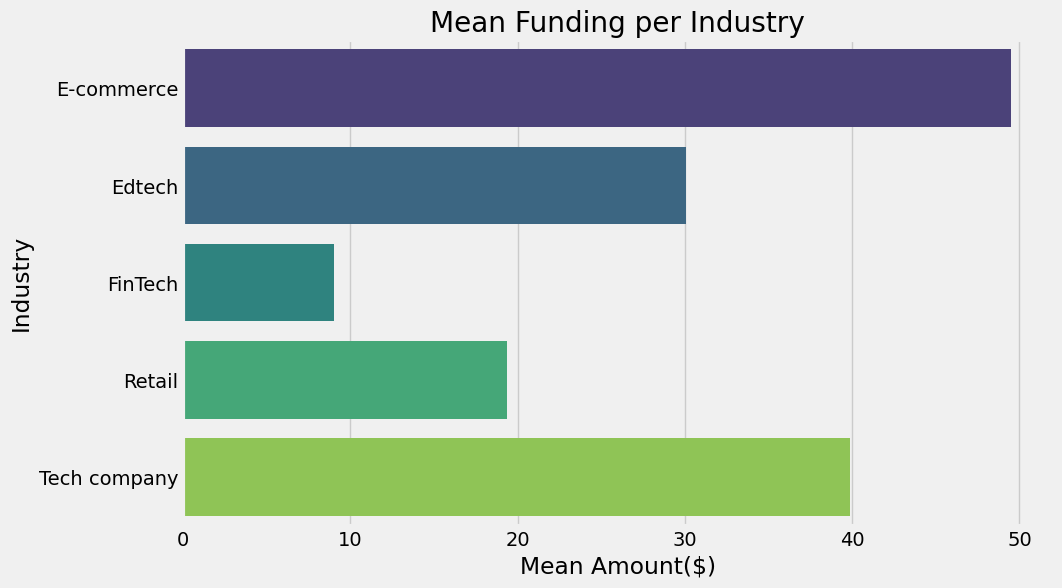


ANOVA Statistic: 340.41215570145374
P-value: 1.3070158696085411e-72
Reject the null hypothesis; there are significant differences between the group means.


In [197]:
from scipy import stats
# Generate a hypothetical dataset with more data points
np.random.seed(42)
Industry = ['FinTech', 'Retail', 'Edtech', 'Tech company', 'E-commerce']
 
data = {'Industry': np.repeat(Industry, 30),
        'Amount($)': np.concatenate([np.random.normal(loc=i*10, scale=5, size=30) for i in range(1, 6)])}
 
df = pd.DataFrame(data)
 
# Calculate means per sector
means_per_Industry = df.groupby('Industry')['Amount($)'].mean().reset_index()
 
# Plotting the bar chart of means
plt.figure(figsize=(10, 6))
plt.title('Mean Funding per Industry')
sns.barplot(data=means_per_Industry, x='Amount($)', y='Industry', palette='viridis')
plt.ylabel('Industry')
plt.xlabel('Mean Amount($)')
plt.show()
 
# Perform one-way ANOVA using scipy.stats
grouped_Industry = [df[df['Industry'] == Industry]['Amount($)'] for Industry in Industry]
statistic, p_value = stats.f_oneway(*grouped_sectors)
 
# Print the ANOVA results
print(f"\nANOVA Statistic: {statistic}")
print(f"P-value: {p_value}")
 
# Check if the p-value is less than the significance level (e.g., 0.05)
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis; there are significant differences between the group means.")
else:
    print("Fail to reject the null hypothesis; there is no significant difference between the group means.")

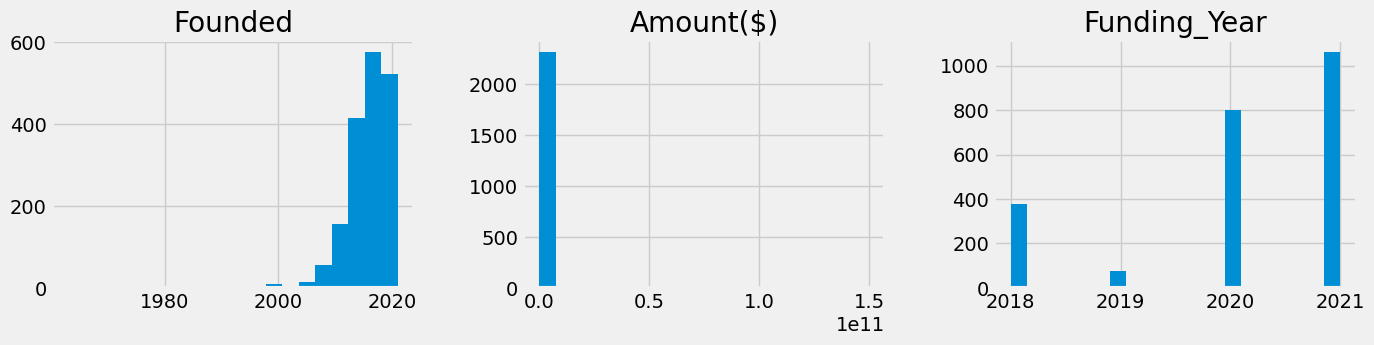

In [139]:
#General overview of the numeric dataset
final_df.hist(figsize=(15,15),layout=(4,3),bins=20);
plt.grid=(False)
plt.show()

Question: 1 Which top 5 sectors/industries have the highest funding?

In [140]:
top_5_sectors=final_df.groupby('Industry')['Amount($)'].sum().reset_index()
top_5_sectors=top_5_sectors.sort_values(by=('Amount($)'),ascending=False)
F = top_5_sectors.head(5)


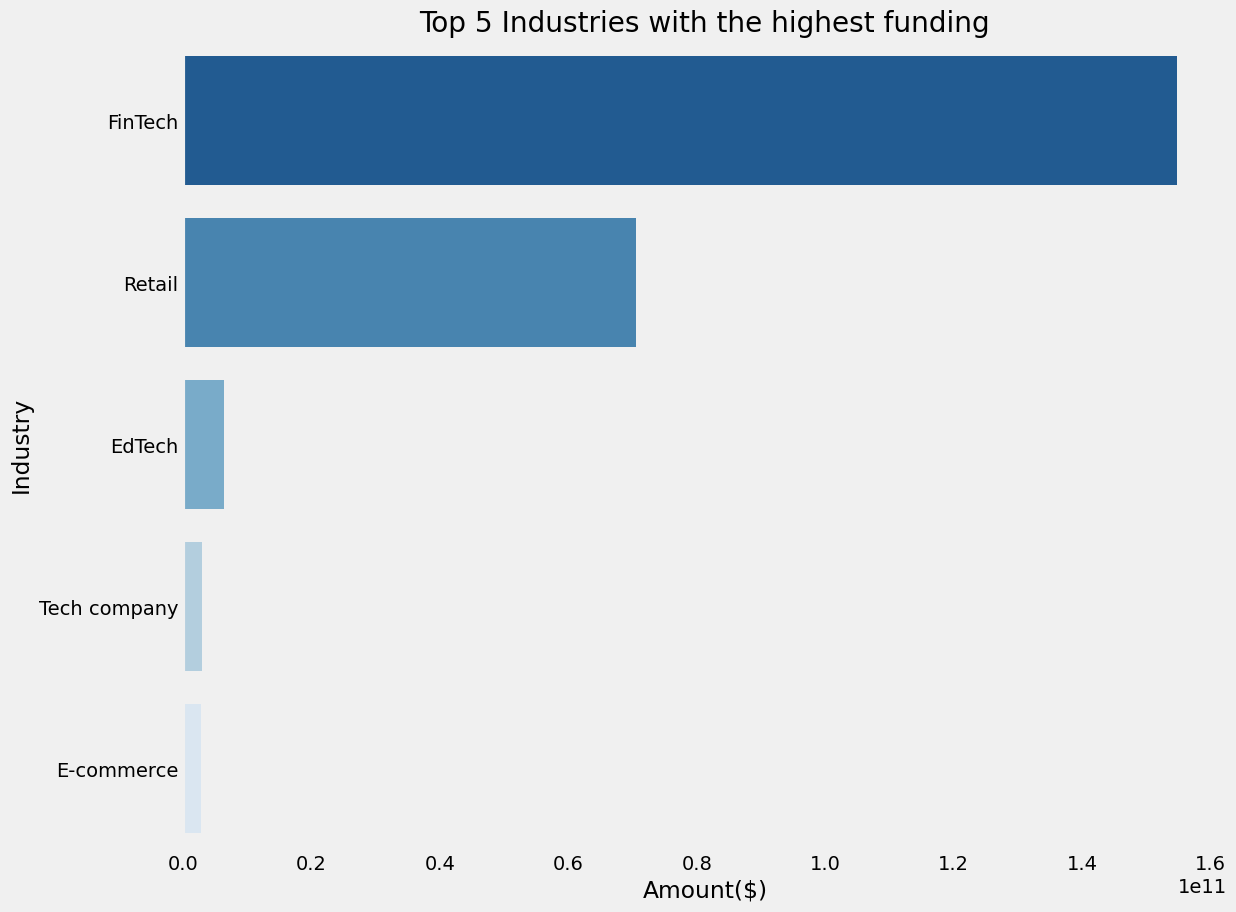

In [162]:
plt.figure(figsize=(12,10))
plt.title('Top 5 Industries with the highest funding')
plt.style.use('fivethirtyeight')
ax=sns.barplot(data=F, x='Amount($)', y='Industry', palette='Blues_r')
ax.grid(False)

plt.ylabel('Industry')
plt.xlabel('Amount($)')

plt.show()


The clustered bar chart shows the distribution of funds in the various industries over the period. 
For a startup looking to venture in the Indian Startup Ecosystem this information is extremely useful as it helps to identify the industry that tends to receive a lot of funding which ultimately translates in the growth and profit margins.


Question:2  Which Year had the highest funding amount.

In [148]:
pd.set_option('display.float_format', '{:,.2f}'.format)
year_with_highest_funding=final_df.groupby('Funding_Year')['Amount($)'].sum().reset_index()
year_with_highest_funding=year_with_highest_funding.sort_values(by=('Amount($)'),ascending=False)
H = year_with_highest_funding.head(5)
H

,Funding_Year,Amount($)
3,2021,"179,823,412,000.00"
2,2020,"88,346,818,604.00"
0,2018,"6,641,523,177.00"
1,2019,"3,336,433,200.00"


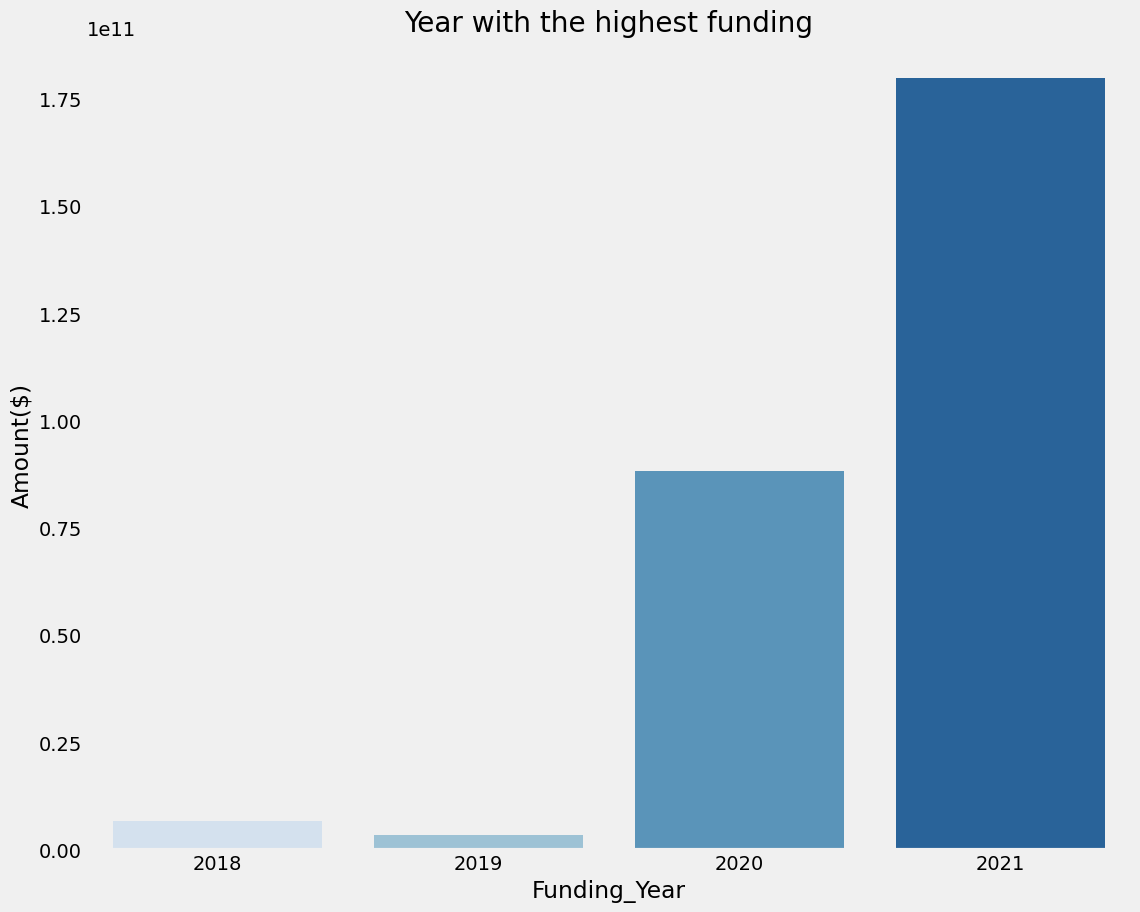

In [163]:
plt.figure(figsize=(12,10,))
plt.title('Year with the highest funding')
plt.style.use('fivethirtyeight')
ax=sns.barplot(data=H, x= 'Funding_Year', y='Amount($)', palette='Blues')
ax.grid(False)
plt.ylabel('Amount($)')
plt.xlabel('Funding_Year')
            

plt.show()

The above chart shows the year with the highest funding and shows the continued interest of investors in the Indian Startup Ecosystem. From funding of 7bn in 2018 to to 180bn 2021 which shows more than 85% growth in the Startup system one can be rest assured of experience tremendous growth and available funding should other important aspects of the business be maintained well.



Queestion 3: Identify the number of startups that have received more than 20000000 dollars in funding 


In [150]:
companies= final_df[final_df['Amount($)']>20000000]
companies
len(companies)

439

439 startups received more than 20000000 in funding , this goes to show how much money is being pumped into the Indian Startup Ecosystem.

Question 4: Which top 10 sectors had the highest number of startups

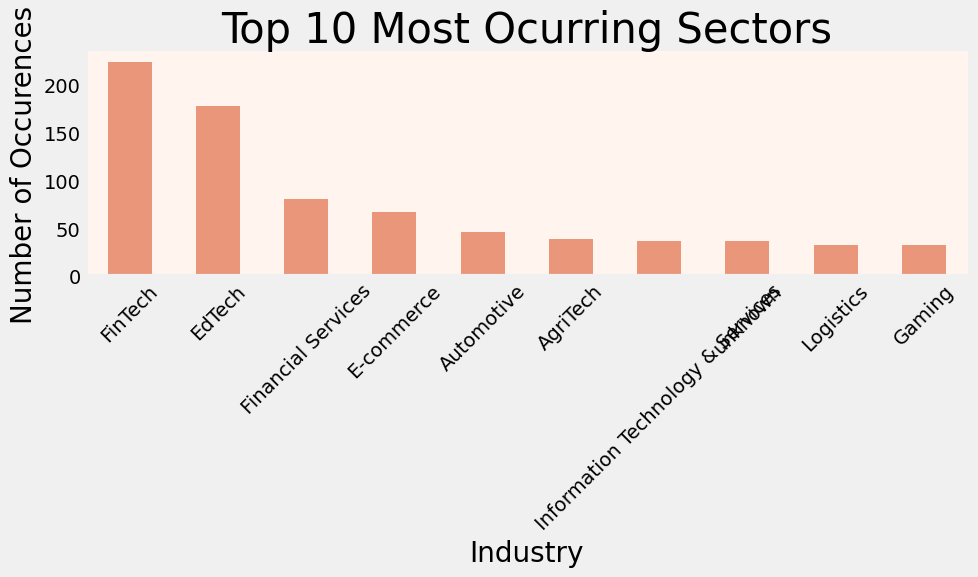

In [157]:
#Defining top 10 sectors
top_sectors = final_df['Industry'].value_counts().head(10)
top_sectors
 
#Plotting a barchart for top 10 sectors
ax = top_sectors.plot(kind='bar', figsize=(10,6), color='darksalmon',grid=False)
plt.title('Top 10 Most Ocurring Sectors', fontsize=30, color='black')
plt.xlabel('Industry', fontsize=20, color='black')
plt.ylabel('Number of Occurences', fontsize= 20, color='black')
#Rotating x axis for better readability
plt.xticks(rotation=45)
plt.tight_layout()

#Bolding the X and Y axis labels
plt.xticks()
plt.yticks()
 
#customizing plot background
ax.set_facecolor('seashell')
 
# Remove borders or spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.spines['left'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
 
# Add labels with values on top of each bar
 
#Show bar chart
plt.show()

As an investor wishing to enter the ecosystem, one of these industries should be your goal in terms of where you will be investing. Additionally, the demands of the populace dictate where start-up owners venture. These charts highlight the leading industries in the India Startup Ecosysem.





In [164]:
#Find the maximum amount invested in sector Fintech in each year

fintech_funds=final_df[final_df['Industry']=='Fintech']
maximum_amount_each_year = final_df.groupby('Funding_Year')['Amount($)'].max()
maximum_amount_each_year

Funding_Year
2018     1,000,000,000.00
2019       693,000,000.00
2020    70,000,000,000.00
2021   150,000,000,000.00
Name: Amount($), dtype: float64

Text(0.5, 0, 'Funding_Year')

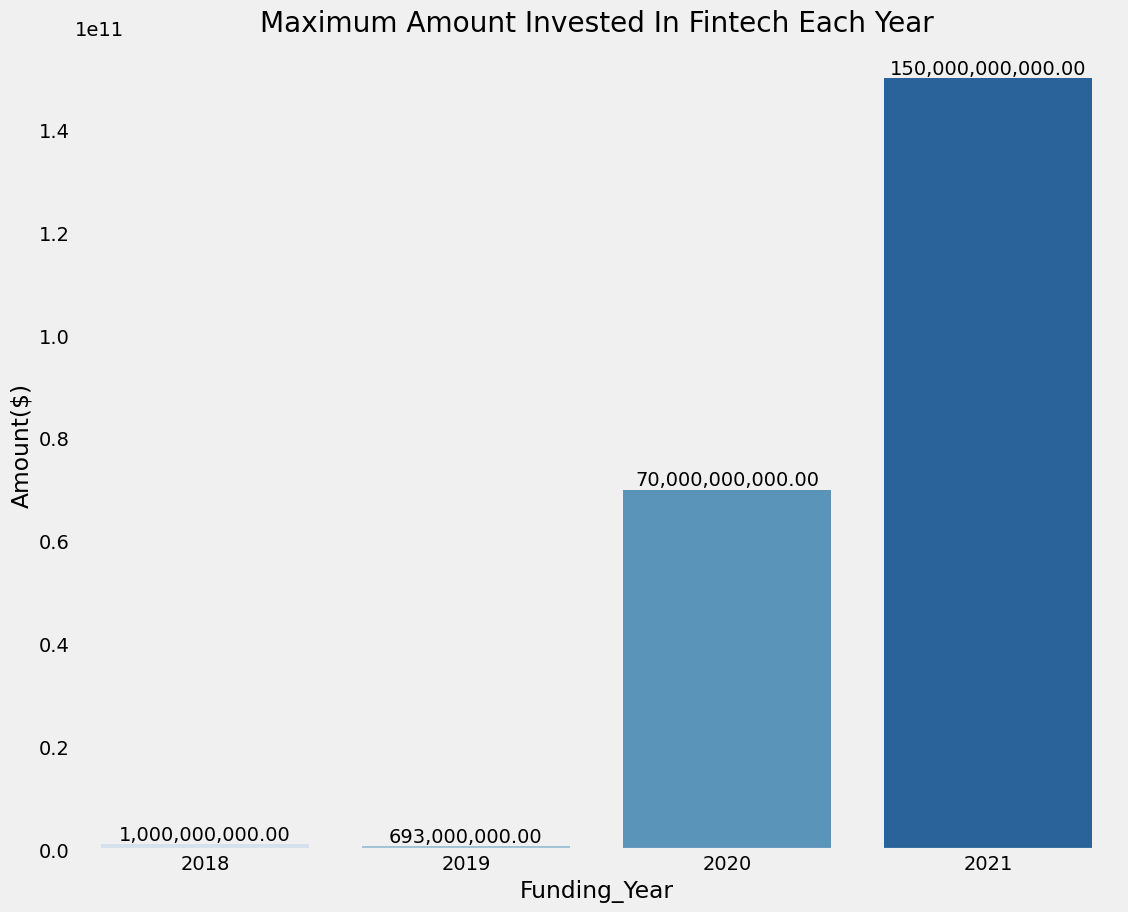

In [179]:
plt.figure(figsize=(12,10,))
plt.title('Maximum Amount Invested In Fintech Each Year')
plt.style.use('fivethirtyeight')
ax=sns.barplot(data=maximum_amount_each_year, palette='Blues')
ax.grid(False)
for container in ax.containers:
    ax.bar_label(container, fmt='{:,.2f}')
plt.ylabel('Amount($)')
plt.xlabel('Funding_Year')

It is prudent to find out how much money is invested in the FinTech industry, which leads the way in both funding and startup counts. With $1,000,000 invested in 2018 and a consistent rise over the years, it is encouraging to invest in the fintech sector because it appears to be growing at an exponential rate.


In [186]:
#How many companies received funding every year
#Grouping year to find a count of number of companies that recieved funding in each year of the dataset
Funding_Year =final_df.groupby(['Funding_Year']).count().reset_index()
Funding_Year

,Funding_Year,Company Name,Founded,HeadQuarter,Industry,About Company,Founders,Investor,Amount($),Stage
0,2018,377,0,377,377,377,0,0,377,377
1,2019,77,52,77,77,77,74,77,77,77
2,2020,799,654,799,799,799,792,773,799,799
3,2021,1062,1061,1062,1062,1062,1058,1006,1062,1062


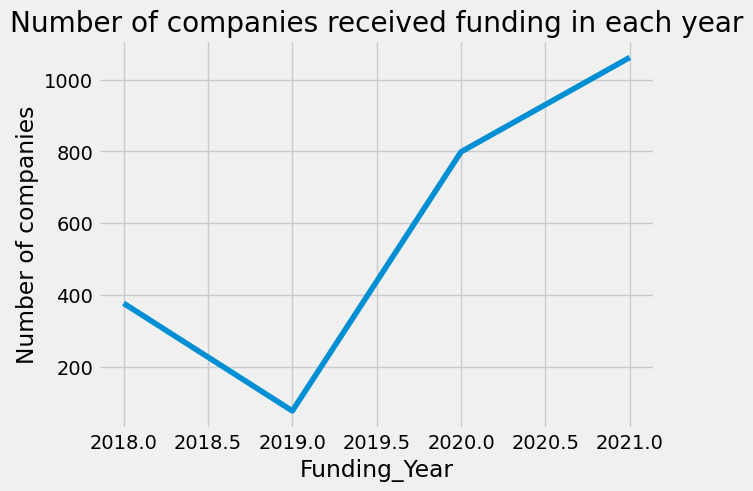

In [188]:
#Plotting a line chart to see trend of amount of funding received every year
 
plt.title('Number of companies received funding in each year')
ax=sns.lineplot(y=Funding_Year['Company Name'],x=Funding_Year['Funding_Year'])
ax.set(xlabel='Funding_Year',ylabel='Number of companies')
plt.show()

Between 2018 and 2019, there was a notable drop in the quantity of startups that obtained investment from investors. Between 2019 and 2021, there was an exponential rise in the number of businesses receiving investment.



In [182]:
final_df.to_csv('Indian_Startup_Data.csv')